# Análise de dados do Titanic
## 1. Introdução

### Sobre o conjunto de dados
O conjunto de dados utilizado foi obtido do site Kaggle.com, onde analisaremos 891 registros de passageiros do navio, para entender a quantidade de sobreviventes, mortos e os possíveis fatores que contribuíram para os resultados do evento.

### O que buscamos descobrir com essa análise?

Entre os dados obtidos dos passageiros, buscamos responder às seguintes questões:

1. Qual a quantidade de passageiros do sexo masculino e feminino no navio? 
2. Qual a quantidade de sobreviventes e mortos entre homens e mulheres?
3. Qual a média de idade dos sobreviventes?
4. Qual a média de idade daqueles que não sobreviveram?
5. Qual a quantidade de sobreviventes e mortos entre crianças (menores de 12 anos)?
6. O gênero para crianças fazia diferença na hora do salvamento?
7. Crianças tinham mais chance de salvamento que os adultos?
8. A classe social, analisando a classe do ticket, contribuiu para o salvamento dos passageiros mais ricos?
9. Passageiros que viajavam na companhia de familiares tiveram maior chance de sobrevivência?
10. Passageiros que viajavam sozinhos tiveram maior chance de sobrevivência?
11. Entre os mortos dos passageiros que viajavam sozinhos, houve alguma característica para que as chances de salvamento diminuíssem?

## 2. Limpeza dos dados
Iremos importar o dataset, fazer uma exploração nos dados e começar a entender quais limpezas e preparações precisam ser feitas.

In [1]:
# Importando o pandas, matplotlib e lendo o arquivo .csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds_titanic = pd.read_csv('titanic-data-6.csv')

# Verificando o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
# Explorando uma primeira fatia dos dados contidos no dataset
ds_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Usando a média para completar a coluna de idade (Age)
mean_age = ds_titanic['Age'].mean()
ds_titanic['Age'].fillna(mean_age, inplace=True)

# Verificando se a modificação funcionou
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Apagando as colunas "Cabin", "Embarked" e "Ticket", já que elas não são interessantes para nossa análise
ds_titanic.drop(['Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [5]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [6]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [7]:
# Renomeando o nome das colunas para dar maior clareza na hora da análise

ds_titanic.rename(index=str, 
                  columns={"Pclass": "Ticket_Class", 
                           "SibSp": "Number_siblings_spouses", 
                           "Parch": "Number_parent_children"}, 
                  inplace=True)

In [8]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,Number_siblings_spouses,Number_parent_children,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [9]:
# Verificando se há dados duplicados
sum(ds_titanic.duplicated())

0

Para esta análise, foram verificados os dados iniciais do dataset e observado que a coluna "Age" estava incompleta, com valores ausentes. Por isso, foi necessário completar os valores ausentes para tornar a coluna completa e, portanto, foi utilizada a média dos dados para tal.

O segundo passo foi remover as colunas "Cabin", "Embarked" e "Ticket", pois não foram consideradas úteis para o tipo de análise previsa.

Em seguida as colunas "Pclass", "SibSp" e "Parch" foram renomeadas para nomes mais didáticos, que traduziam o real significado dos dados - conforme observado na explicação do dataset no site do Kaggle.

O último passo foi verificar a presença de dados duplicados e, nessa tarefa, observamos que não havia nenhum registro com essa condição.

Com os dados preparados, podemos iniciar o próximo passo - de análise de dados - logo abaixo.

## 3. Análise dos dados
Com o dataset limpo e preparado, podemos começar a responder às perguntas sobre os passageiros e o desastre, conforme listados a seguir:

In [10]:
# Método para desenhar um gráfico do tipo barra
def draw_bar_chart(total_values, 
                   chart_labels, 
                   chart_labels_positions, 
                   chart_x_label, 
                   chart_y_label, 
                   chart_title, 
                   bar_width, 
                   bar_color):
    plt.xticks(chart_labels_positions, chart_labels)
    plt.yticks(total_values)
    plt.xlabel(chart_x_label)
    plt.ylabel(chart_y_label)
    plt.title(chart_title)
    plt.bar(chart_labels_positions, total_values, width=bar_width, color=bar_color)
    plt.show()

### 1. Qual a quantidade de passageiros do sexo masculino e feminino no navio?

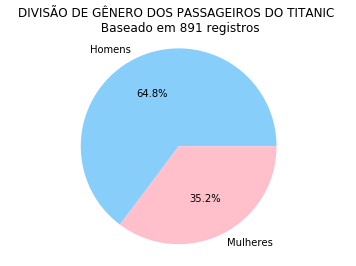

In [11]:
# Verificando o total de homens e mulheres presentes no dataset, independente da idade
total_male_passengers = ds_titanic[(ds_titanic.Sex == 'male')]['PassengerId'].count()
total_female_passengers = ds_titanic[(ds_titanic.Sex == 'female')]['PassengerId'].count()

# Atribuindo para a lista com a finalidade de desenhar o gráfico
total_passengers = [total_male_passengers, total_female_passengers]

# Definindo os detalhes visuais do gráfico
passenger_labels = ['Homens', 'Mulheres']
passenger_colors = ['lightskyblue', 'pink']
passenger_labels_pos = [0,3]

# Desenhando o gráfico
plt.pie(total_passengers, labels=passenger_labels, autopct='%1.1f%%', colors=passenger_colors)
plt.axis('equal')
plt.title('DIVISÃO DE GÊNERO DOS PASSAGEIROS DO TITANIC \n Baseado em ' + str(total_male_passengers +
                                                                              total_female_passengers) + ' registros')
plt.show()

De todos os registros do dataset utilizado, podemos ver que a quantidade de passageiros do sexo masculino eram muito superiores aos passageiros do sexo feminino - quase o dobro da quantidade.

### 2. Qual a quantidade de sobreviventes e mortos entre homens e mulheres?

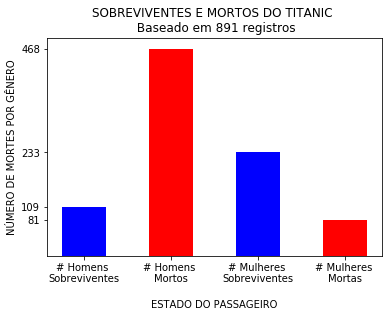

In [12]:
# Descobrindo o total de mortos e sobreviventes para cada gênero
total_male_survived = ds_titanic.query('Sex == "male" and Survived == 1')['PassengerId'].count()
total_male_died = ds_titanic.query('Sex == "male" and Survived == 0')['PassengerId'].count()
total_female_survived = ds_titanic.query('Sex == "female" and Survived == 1')['PassengerId'].count()
total_female_died = ds_titanic.query('Sex == "female" and Survived == 0')['PassengerId'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_passenger_values = [total_male_survived, total_male_died, total_female_survived, total_female_died]
passenger_labels = ['# Homens \nSobreviventes', '# Homens \nMortos', '# Mulheres \nSobreviventes', '# Mulheres \nMortas']
passenger_labels_pos = [0,4,8,12]
x_label = '\nESTADO DO PASSAGEIRO'
y_label = 'NÚMERO DE MORTES POR GÊNERO'
chart_title = 'SOBREVIVENTES E MORTOS DO TITANIC \n Baseado em 891 registros'
bar_width = 2
bar_color = ('b','r')

draw_bar_chart(total_passenger_values,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Com um número superior de passageiros, os homens tiveram as maiores baixas no acidente. Além disso, tradicionalmente mulheres e crianças possuem prioridade no salvamento em casos emergenciais e isso pode nos dizer o motivo da maioria de mulheres terem sobrevivido.

### 3. Qual a média de idade dos sobreviventes?

In [13]:
survivors_mean_age = round(ds_titanic[(ds_titanic.Survived == 1)]['Age'].mean(),2)

### 4. Qual a média de idade daqueles que não sobreviveram?

In [14]:
deaths_mean_age = round(ds_titanic[(ds_titanic.Survived == 0)]['Age'].mean(),2)

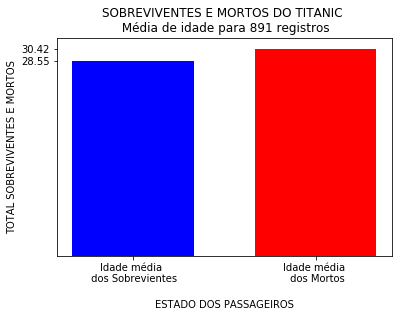

In [15]:
# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
passengers_age_by_status = [survivors_mean_age, deaths_mean_age]
passenger_labels = ['Idade média \n dos Sobrevientes', 'Idade média \n dos Mortos']
passenger_labels_pos = [0,3]
x_label = '\nESTADO DOS PASSAGEIROS'
y_label = 'TOTAL SOBREVIVENTES E MORTOS'
chart_title = 'SOBREVIVENTES E MORTOS DO TITANIC \n Média de idade para 891 registros'
bar_width = 2
bar_color = ('b','r')

draw_bar_chart(passengers_age_by_status,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Não tivemos muita diferença na média de idade entre mortos e sobreviventes. Foram 28 anos (quase 29) entre os sobreviventes e 30 anos (mais inclinado ao 30) para os passageiros mortos.

### 5. Qual a quantidade de sobreviventes e mortos entre crianças (menores de 12 anos)?

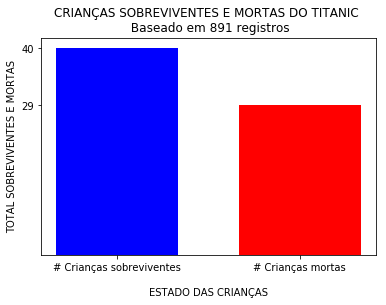

In [16]:
# Descobrindo o total de crianças que sobreviveram ou não
total_children_survived = ds_titanic.query('Age <= 12.0 and Survived == 1')['PassengerId'].count()
total_children_died = ds_titanic.query('Age <= 12.0 and Survived == 0')['PassengerId'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_children_values = [total_children_survived, total_children_died]
passenger_labels = ['# Crianças sobreviventes', '# Crianças mortas']
passenger_labels_pos = [0,3]
x_label = '\nESTADO DAS CRIANÇAS'
y_label = 'TOTAL SOBREVIVENTES E MORTAS'
chart_title = 'CRIANÇAS SOBREVIVENTES E MORTAS DO TITANIC \n Baseado em 891 registros'
bar_width = 2
bar_color = ('b','r')

draw_bar_chart(total_children_values,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Entre as crianças tivemos números bem próximos, considerando sobreviventes e mortos. É interessante entendermos se havia prioridade de salvamento para crianças do sexo feminino, por exemplo.

### 6. O gênero para crianças fazia diferença na hora do salvamento?

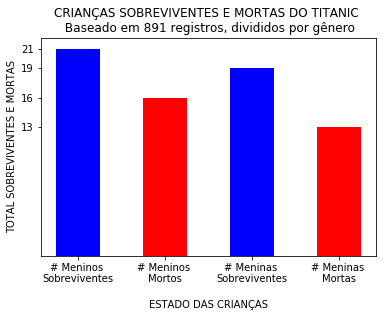

In [17]:
# Descobrindo o total de mortos e sobreviventes para cada gênero (considerando apenas crianças)
total_boys_survived = ds_titanic.query('Age <= 12.0 and Survived == 1 and Sex == "male"')['PassengerId'].count()
total_boys_died = ds_titanic.query('Age <= 12.0 and Survived == 0 and Sex == "male"')['PassengerId'].count()
total_girls_survived = ds_titanic.query('Age <= 12.0 and Survived == 1 and Sex == "female"')['PassengerId'].count()
total_girls_died = ds_titanic.query('Age <= 12.0 and Survived == 0 and Sex == "female"')['PassengerId'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_children_values = [total_boys_survived, total_boys_died, total_girls_survived, total_girls_died]
passenger_labels = ['# Meninos \nSobreviventes', '# Meninos \nMortos', '# Meninas \nSobreviventes', '# Meninas \nMortas']
passenger_labels_pos = [0,4,8,12]
x_label = '\nESTADO DAS CRIANÇAS'
y_label = 'TOTAL SOBREVIVENTES E MORTAS'
chart_title = 'CRIANÇAS SOBREVIVENTES E MORTAS DO TITANIC \n Baseado em 891 registros, divididos por gênero'
bar_width = 2
bar_color = ('b','r')

draw_bar_chart(total_children_values,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Novamente, temos números bem parecidos. Meninos e meninas tiveram resultados praticamente iguais em relação os sobreviventes - e até no número de mortes. Com isso, podemos pensar que não havia prioridade de salvamento entre crianças.

### 7. Crianças tinham mais chance de salvamento que os adultos?

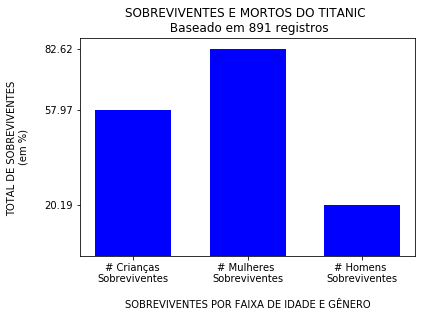

In [18]:
# Recuperando o total de crianças, mulheres adultas e homens adultos
total_children = ds_titanic.query('Age <= 12')['Age'].count()
total_female = ds_titanic.query('Age > 12 and Sex == "female"')['PassengerId'].count()
total_male = ds_titanic.query('Age > 12 and Sex == "male"')['PassengerId'].count()

# Descobrindo o percentual de crianças, mulheres e homens que sobreviveram em relação ao total de cada grupo
children_perc = total_children_survived / total_children * 100
male_perc = total_female_survived / total_female * 100
female_perc = total_male_survived / total_male * 100

# Atribuindo os valores obtidos para utilização no gráfico
total_people_values = [children_perc, male_perc, female_perc]
passenger_labels = ['# Crianças \nSobreviventes', '# Mulheres \nSobreviventes', '# Homens \nSobreviventes']
passenger_labels_pos = [0,3,6]
x_label = '\nSOBREVIVENTES POR FAIXA DE IDADE E GÊNERO'
y_label = 'TOTAL DE SOBREVIVENTES \n(em %)\n'
chart_title = 'SOBREVIVENTES E MORTOS DO TITANIC \n Baseado em 891 registros'
bar_width = 2
bar_color = 'b'

draw_bar_chart(total_people_values,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Analisando a porcentagem de sobreviventes, podemos perceber que mulheres e crianças - como esperado - tiveram maior índice de sobrevivência. Foram 82,62% de mulheres adultas sobreviventes, 57,97% de crianças sobreviventes e, apenas, 20,19% de homens adultos sobreviventes.

### 8. A classe social, analisando a classe do ticket, contribuiu para o salvamento dos passageiros mais ricos?

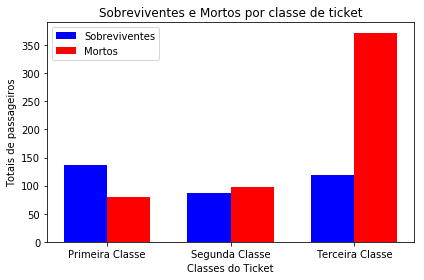

In [19]:
# Descobrindo o total de sobreviventes por classe
total_survivors_first_class = ds_titanic.query('Ticket_Class == 1 and Survived == 1')['PassengerId'].count()
total_survivors_second_class = ds_titanic.query('Ticket_Class == 2 and Survived == 1')['PassengerId'].count()
total_survivors_third_class = ds_titanic.query('Ticket_Class == 3 and Survived == 1')['PassengerId'].count()

# Criando uma tupla para ser usada no gráfico
total_survivors_by_class = (total_survivors_first_class, 
                            total_survivors_second_class, 
                            total_survivors_third_class)

# Descobrindo o total de mortos por classe
total_deaths_first_class = ds_titanic.query('Ticket_Class == 1 and Survived == 0')['PassengerId'].count()
total_deaths_second_class = ds_titanic.query('Ticket_Class == 2 and Survived == 0')['PassengerId'].count()
total_deaths_third_class = ds_titanic.query('Ticket_Class == 3 and Survived == 0')['PassengerId'].count()

# Criando uma tupla para ser usada no gráfico
total_deaths_by_class = (total_deaths_first_class, 
                         total_deaths_second_class, 
                         total_deaths_third_class)

# Possibilitando o uso de múltiplos subplots para comparar os itens lado a lado
fig, ax = plt.subplots()

# Definindo o index de cada grupo, baseando-se na quantidade de grupos necessários no gráfico (3)
index = np.arange(3)

# Definindo a largura da barra
bar_width = 0.35

# Desenhando cada barra (e seus dados) nas posições definidas no gráfico
ax.bar(index, total_survivors_by_class, bar_width, color='blue',
                label='Sobreviventes')
ax.bar(index + 0.35, total_deaths_by_class, bar_width, color='red',
                label='Mortos')

# Definindo as informações do gráfico para fácil entendimento
ax.set_xlabel('Classes do Ticket')
ax.set_ylabel('Totais de passageiros')
ax.set_title('Sobreviventes e Mortos por classe de ticket')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Primeira Classe', 'Segunda Classe', 'Terceira Classe'))
ax.legend()

# Melhorando o visual do gráfico e gerando ele de fato
fig.tight_layout()
plt.show()

Analisando os números da classe social, respaldados pelo tipo do ticket, podemos ver que há um grande índice de morte de passageiros da terceira classe. É claro que, no total, essa classe de passageiro era mais presente no dataset atualizado, mas não podemos ignorar dois possíveis fatos:
1. Havia prioridade de salvamento para passageiros mais bem posicionados na sociedade;
2. A posição das cabines de terceira classe contribuíram para diminuir a chance de salvamento - e isso não temos como comprovar.

Esses dois casos são possibilidades que uma análise mais profunda e com um conjunto de dados mais completo poderia ajudar a responder.

### 9. Passageiros que viajavam na companhia de familiares tiveram maior chance de sobrevivência?

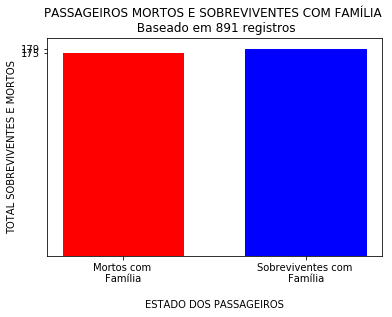

In [20]:
# Descobrindo o total de passageiros com família
total_passengers_family = ds_titanic[(ds_titanic.Number_parent_children > 0) |
                                     (ds_titanic.Number_siblings_spouses > 0)]['PassengerId'].count()

# Descobrindo o número de mortos e sobreviventes que viajavam com família
died_with_family = ds_titanic[(ds_titanic.Survived == 0) & 
                              ((ds_titanic.Number_parent_children > 0) |
                              (ds_titanic.Number_siblings_spouses > 0))]['PassengerId'].count()

survived_with_family = ds_titanic[(ds_titanic.Survived == 1) &
                                  ((ds_titanic.Number_parent_children > 0) |
                                  (ds_titanic.Number_siblings_spouses > 0))]['PassengerId'].count()

# Atribuindo os resultados para uma lista que será usada na tabela
total_passengers_with_family = [died_with_family, survived_with_family]
passenger_labels = ['Mortos com \nFamília', 'Sobreviventes com \nFamília']
passenger_labels_pos = [0,3]
x_label = '\nESTADO DOS PASSAGEIROS'
y_label = 'TOTAL SOBREVIVENTES E MORTOS'
chart_title = 'PASSAGEIROS MORTOS E SOBREVIVENTES COM FAMÍLIA \n Baseado em 891 registros'
bar_width = 2
bar_color = ('r','b')

draw_bar_chart(total_passengers_with_family,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Como podemos ver, passageiros que viajavam acompanhados, com algum tipo de familiar, não tiveram tanta vantagem no salvamento.

### 10. Passageiros que viajavam sozinhos tiveram maior chance de sobrevivência?

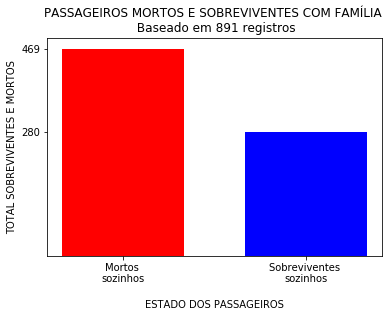

In [21]:
# Descobrindo o total de passageiros sem família
total_alone = ds_titanic[(ds_titanic.Number_parent_children == 0) |
                                    (ds_titanic.Number_siblings_spouses == 0)]['PassengerId'].count()

alone_deaths = ds_titanic[(ds_titanic.Survived == 0) &
                          ((ds_titanic.Number_parent_children == 0) |
                          (ds_titanic.Number_siblings_spouses == 0))]['PassengerId'].count()

alone_survivors = ds_titanic[(ds_titanic.Survived == 1) & 
                             ((ds_titanic.Number_parent_children == 0) |
                             (ds_titanic.Number_siblings_spouses == 0))]['PassengerId'].count()

# Atribuindo os resultados para uma lista que será usada na tabela
total_passengers_alone = [alone_deaths, alone_survivors]
passenger_labels = ['Mortos \nsozinhos', 'Sobreviventes \nsozinhos']
passenger_labels_pos = [0,3]
x_label = '\nESTADO DOS PASSAGEIROS'
y_label = 'TOTAL SOBREVIVENTES E MORTOS'
chart_title = 'PASSAGEIROS MORTOS E SOBREVIVENTES COM FAMÍLIA \n Baseado em 891 registros'
bar_width = 2
bar_color = ('r','b')

draw_bar_chart(total_passengers_alone,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

Entre os passageiros que viajavam sozinhos, podemos observar que o índice de mortos é bem maior. Por isso, é importante verificar se há alguma característica que indique esse resultado, que faremos logo abaixo.

### 11. Entre os mortos dos passageiros que viajavam sozinhos, houve alguma característica para que as chances de salvamento diminuíssem?

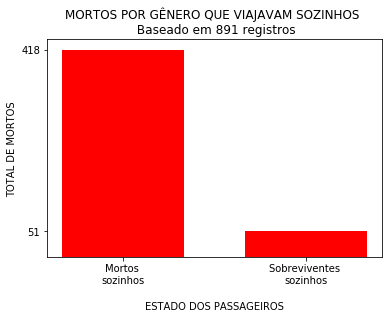

In [22]:
# Descobrindo o número de mortos do gênero masculino que viajavam sozinhos
alone_deaths_male = ds_titanic[(ds_titanic.Survived == 0) &
                               (ds_titanic.Sex == 'male') & 
                               ((ds_titanic.Number_parent_children == 0) |
                                (ds_titanic.Number_siblings_spouses == 0))]['PassengerId'].count()

# Descobrindo o número de mortos do gênero feminino que viajavam sozinhos
alone_deaths_female = ds_titanic[(ds_titanic.Survived == 0) &
                               (ds_titanic.Sex == 'female') & 
                               ((ds_titanic.Number_parent_children == 0) |
                                (ds_titanic.Number_siblings_spouses == 0))]['PassengerId'].count()

# Atribuindo os resultados para uma lista que será usada na tabela
deaths_by_gender_no_family = [alone_deaths_male, alone_deaths_female]
passenger_labels = ['Mortos \nsozinhos', 'Sobreviventes \nsozinhos']
passenger_labels_pos = [0,3]
x_label = '\nESTADO DOS PASSAGEIROS'
y_label = 'TOTAL DE MORTOS'
chart_title = 'MORTOS POR GÊNERO QUE VIAJAVAM SOZINHOS \n Baseado em 891 registros'
bar_width = 2
bar_color = 'r'

draw_bar_chart(deaths_by_gender_no_family,
               passenger_labels,
               passenger_labels_pos,
               x_label,
               y_label,
               chart_title,
               bar_width,
               bar_color)

A grande maioria dos mortos, para passageiros que viajavam sozinhos, se encontra no grupo de homens. Como vimos no começo da análise, os homens tiveram um grande número de mortes em relação às mulheres - talvez pela falta de prioridade no salvamento -, e o gráfico acima nos faz concluir e chegar em algumas conclusões.

## 5. Conclusões
Com isso, concluímos nossa análise e chegamos nas seguintes conclusões:

1. Crianças e Mulheres tiveram prioridade no salvamento;
2. Pessoas da terceira classe morreram mais, seja por existirem em maior número (o que aumenta estatisticamente as chances) ou pela posição das cabines dentro do navio, devido à classe do ticket - nesse último caso, não temos como confirmar a hipótese; 
3. Pessoas com maior poder aquisitivo PODEM ter recebido maior prioridade de salvamento;
3. Homens que viajavam sozinhos morreram mais, provavelmente por falta de prioridade no salvamento por conta do gênero e também por representarem um maior número, o que aumenta estatisticamente as chances.

## 6. Limitações
Alguns dados não foram relevantes para a análise, por isso os removemos do conjunto de dados. As seguintes colunas foram removidas:
- Cabin: o número da cabine não nos dizia nada de relevante para a análise. Seria interessante se soubessemos que cabines com determinado código estavam localizadas em setores mais privilegiados para o salvamento, mas, como não temos essa informação, foi melhor remover o campo na fase de preparação dos dados;
- Embarked: o local do embarque também não fazia sentido para esta análise. Era difícil determinar se o local do embarque, de alguma maneira, deu prioridade no salvamento. Podíamos até conhecer os locais onde mais passageiros embarcaram - e sua condição após o desastre -, mas optamos por seguir outra estratégia na análise;
- Ticket: por último, o código do bilhete também não nos diz nada sobre chance de sobrevivência ou morte. Por isso, não trabalhamos com esse dado na análise apresentada.


